# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [52]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [53]:
# Load files into a pandas dataframe
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
ss = pd.read_csv('data/SampleSubmission.csv')
variables = pd.read_csv('data/VariableDefinitions.csv')

In [54]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [55]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [56]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



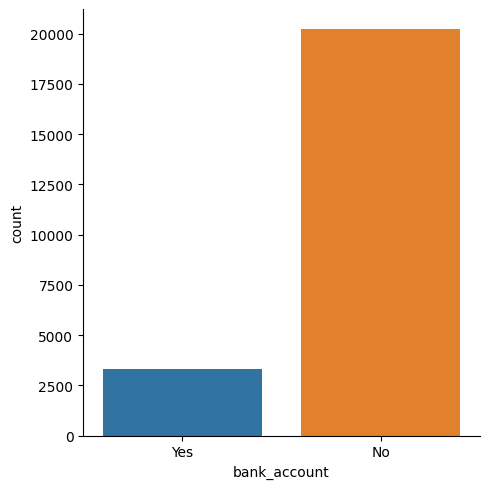

In [57]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)
# Data is imbalance and need be balanced

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [58]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [59]:
 #show some information about the dataset
 print(train.info())

# things to remove from data: uniqueid, year, 

# bank_account 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [60]:
train.groupby(['country', 'year']).size().reset_index(name='count')


,country,year,count
0,Kenya,2018,6068
1,Rwanda,2016,8735
2,Tanzania,2017,6620
3,Uganda,2018,2101


In [61]:
set(train.location_type)

{'Rural', 'Urban'}

In [62]:
train.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

### Encoding step


##### Boolean
##### transform it outsid of preprocessor
location_type                2
cellphone_access             2
gender_of_respondent         2

##### Continuous 
household_size              20
age_of_respondent           85

##### Categorical

##### HotEncoder
country                      4
relationship_with_head       6
marital_status               5
job_type                    10

###### OrdinalEncoder
education_level              6



#### Target
bank_account                 2

In [63]:
train.shape

(23524, 13)

In [64]:
X = train.drop(columns=['uniqueid', 'year', 'bank_account'])

In [133]:
from sklearn.preprocessing import LabelEncoder
y_transformer = LabelEncoder()
y = train['bank_account']

y_transformer = LabelEncoder()
y = y_transformer.fit_transform(y)


In [134]:
print(y)

[1 0 1 ... 0 0 0]


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=42)

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['household_size', 'age_of_respondent']),
        ('cat', OneHotEncoder(drop='first'), ['country', 'relationship_with_head', 'marital_status', 'job_type', 'location_type', 'cellphone_access', 'gender_of_respondent']),
        ('Ordinal', OrdinalEncoder(), ['education_level'])

    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['household_size', 'age_of_respondent']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['country', 'relationship_with_head',
                                  'marital_status', 'job_type', 'location_type',
                                  'cellphone_access', 'gender_of_respondent']),
                                ('Ordinal', OrdinalEncoder(),
                                 ['education_level'])])

In [137]:

transformed_X_train = preprocessor.fit_transform(X_train)

In [138]:
transformed_X_train.shape

(21171, 27)

In [139]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

lr_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('lr', LogisticRegressionCV(max_iter=1000))
])

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE


param_grid = {
    'BestK__k': [5, 10, 20, 'all'],  # Adjust these based on your dataset size
    #'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths
    'lr__penalty': ['l1', 'l2', 'elasticnet'],  # Including elasticnet and none
    'lr__solver': ['saga'],  # Only saga supports elasticnet
    'lr__l1_ratios': [[0.5]],  # Expecting a list of lists for compatibility with LogisticRegressionCV
}


# GridSearchCV setup
grid_search = RandomizedSearchCV(lr_model, param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

In [141]:
grid_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('processor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['household_size',
                                                                                'age_of_respondent']),
                                                                              ('cat',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['country',
                                                                                'relationship_with_head',
                                                                                'marital_status',
                                                                                'job_type',
                                                                                'location_type',
                                                                                'cellphone_access',
                                                                                'gender_of_respondent']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['education_level'])])),
                                             ('BestK', SelectKBest()),
                                             ('imbalance',
                                              SMOTE(random_state=42)),
                                             ('lr',
                                              LogisticRegressionCV(max_iter=1000))]),
                   n_jobs=-1,
                   param_distributions={'BestK__k': [5, 10, 20, 'all'],
                                        'lr__l1_ratios': [[0.5]],
                                        'lr__penalty': ['l1', 'l2',
                                                        'elasticnet'],
                                        'lr__solver': ['saga']},
                   scoring='precision', verbose=1)

In [73]:
Grid_modeling = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [142]:
Grid_modeling.best_params_

{'lr__solver': 'saga',
 'lr__penalty': 'elasticnet',
 'lr__l1_ratios': [0.5],
 'BestK__k': 10}

In [143]:
optimized_model = Grid_modeling.best_estimator_

In [144]:
optimized_model.fit(X_train, y_train)

y_predict = optimized_model.predict(X_test)

In [146]:
y_predict.shape

(2353,)

In [147]:
print(y_predict)

[0 0 0 ... 1 1 1]


In [ ]:
metrics_data = []

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Define a global variable to store metrics and ROC data
metrics_data = []

def append_metrics(model_name, accuracy, precision, recall, f1_score, true_labels, scores):
    """
    Append model performance metrics and data for ROC curve plotting to the global variable metrics_data.
    """
    global metrics_data
    metrics_data.append({
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'True Labels': true_labels,
        'Scores': scores
    })

def plot_metrics():
    """
    Plot the performance metrics stored in metrics_data.
    """
    # Filter out ROC data for metric plotting
    metric_columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    df = pd.DataFrame(metrics_data, columns=metric_columns)
    
    # Set the model name as the index
    df.set_index('Model Name', inplace=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for column in df.columns:
        plt.plot(df.index, df[column], marker='o', label=column)
    
    plt.title('Model Performance Metrics')
    plt.xlabel('Model Name')
    plt.ylabel('Score')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Assume metrics_data is already defined and populated with the necessary data

def plot_all_roc_curves():
    """
    Plot the ROC curves for all models stored in metrics_data.
    """
    plt.figure(figsize=(10, 10))

    for data in metrics_data:
        true_labels = data['True Labels']
        scores = data['Scores']
        model_name = data['Model Name']
        
        fpr, tpr, _ = roc_curve(true_labels, scores)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Accuracy = accuracy_score(y_test, y_predict)
print(Accuracy)
Precision = precision_score(y_test, y_predict)
print(Precision)
Recall = recall_score(y_test, y_predict)
print(Recall)
f1 = f1_score(y_test, y_predict)
print(f1)

print(confusion_matrix(y_test, y_predict))






0.7569060773480663
0.33738191632928477
0.7552870090634441
0.46641791044776126
[[1531  491]
 [  81  250]]


Accuracy: 0.7569
Precision: 0.3374
Recall: 0.7553
F1-Score: 0.4664


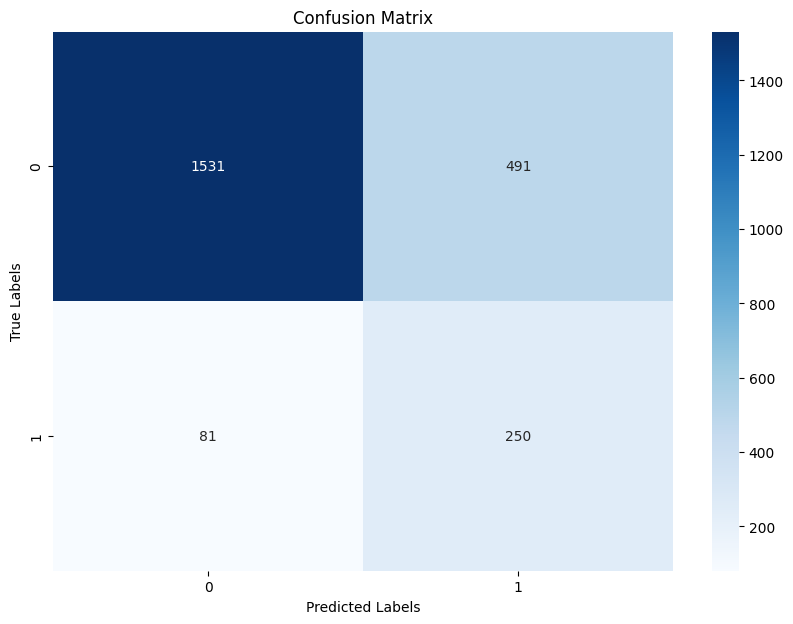

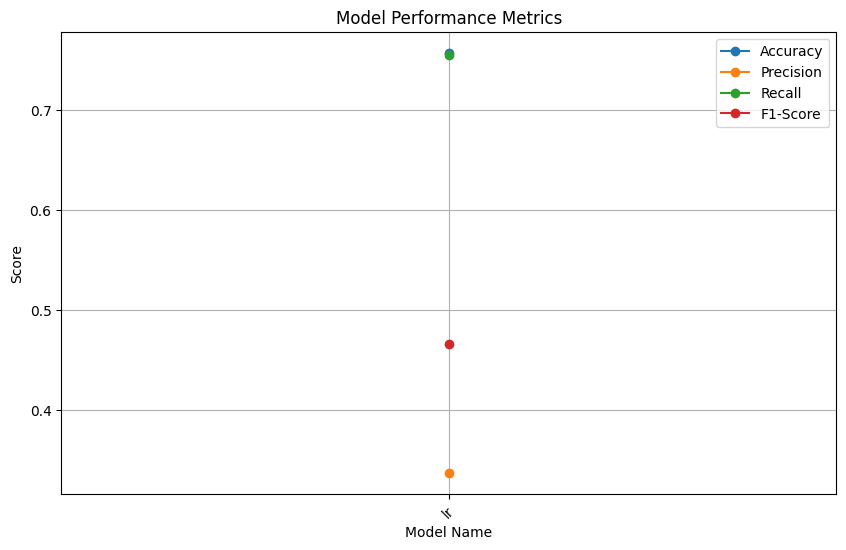

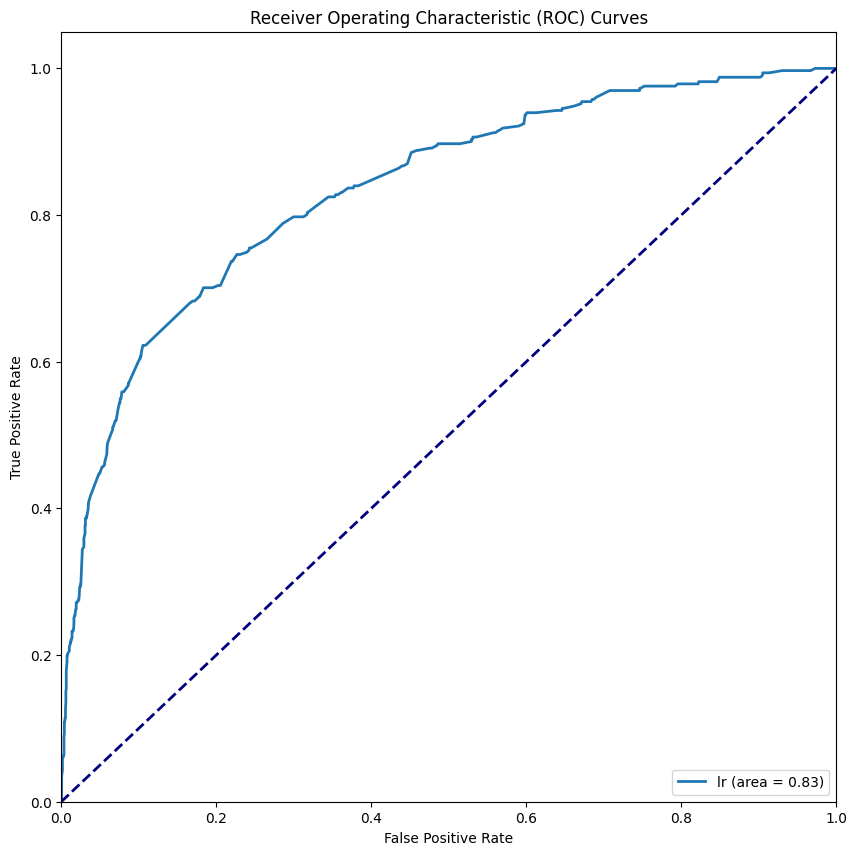

In [155]:
y_pred = optimized_model.predict(X_test)

# Predict probabilities for the positive class (1)
scores = optimized_model.predict_proba(X_test)[:, 1]


# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Example of how to call these functions
append_metrics('lr', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()

Accuracy: 0.8738
Precision: 0.5934
Recall: 0.3263
F1-Score: 0.4211


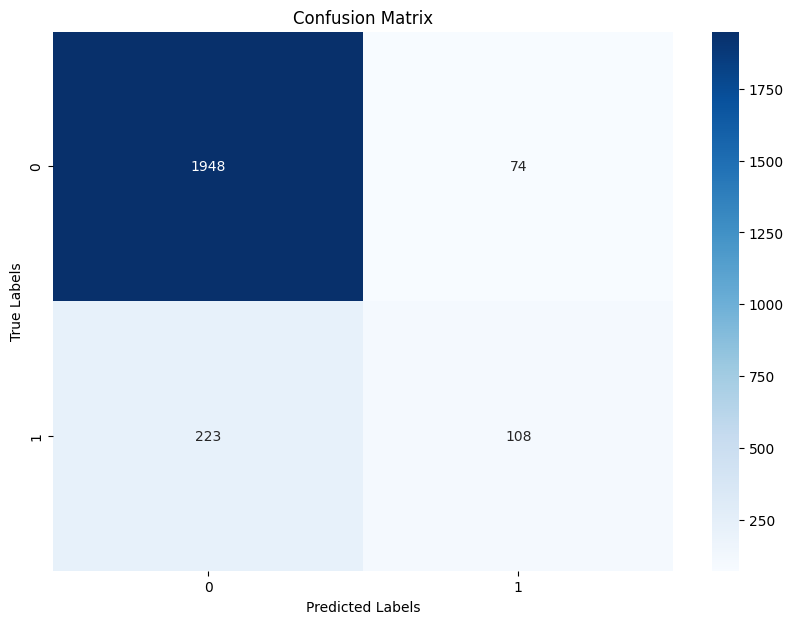

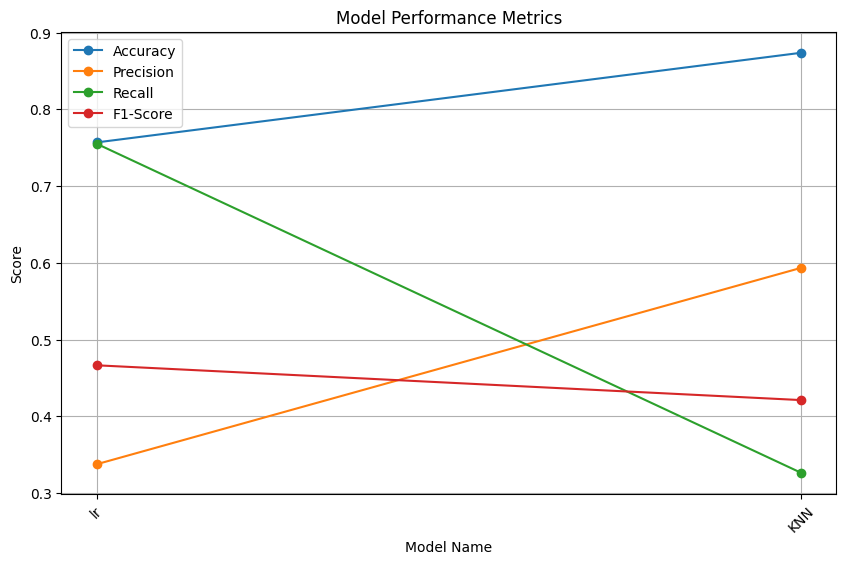

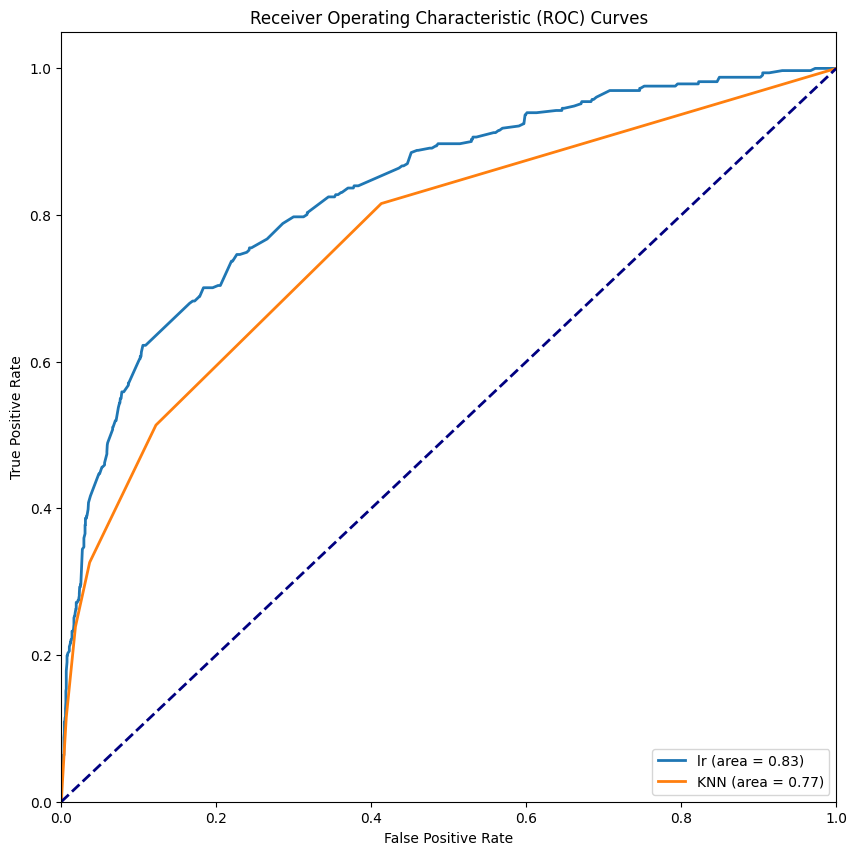

In [156]:
## KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#



KNN_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

KNN_model_fit = KNN_model.fit(X_train, y_train)

y_pred = KNN_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class (1)
scores = KNN_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('KNN', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'preprocessor' and other necessary imports and preprocessing are defined elsewhere

DT_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),
    ('DT', DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, random_state=42))
    ])

DT_model_fit = DT_model.fit(X_train, y_train)

y_pred = DT_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes') # assuming 'Yes' is the positive class
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for the positive class (1), if needed
# Note: DecisionTreeClassifier does not output probabilities in the same manner as GradientBoostingClassifier
# If you need probability estimates, consider using the predict_proba method, but with careful interpretation

# Adjust the append_metrics, plot_metrics, and plot_all_roc_curves functions as necessary
append_metrics('DT', accuracy, precision, recall, f1, y_test, y_pred)  # Adjust according to your implementation
plot_metrics()
# plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


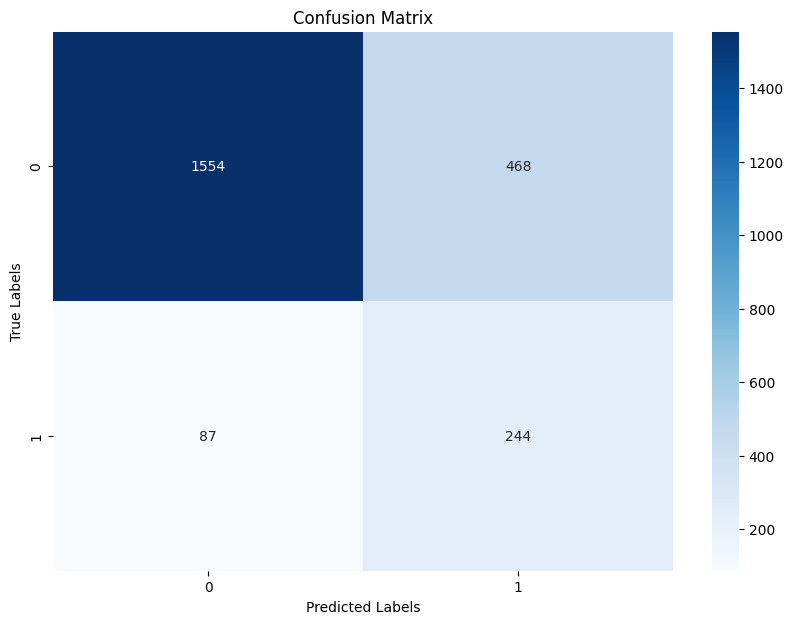

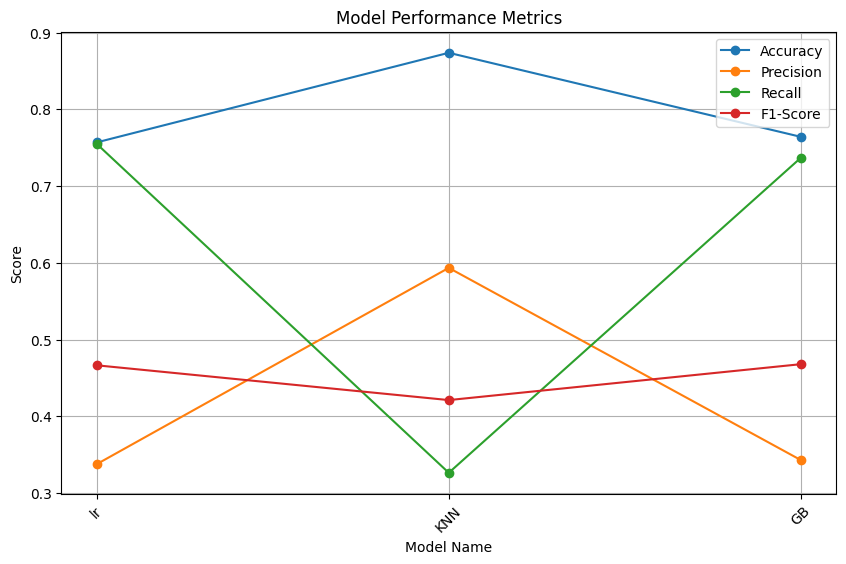

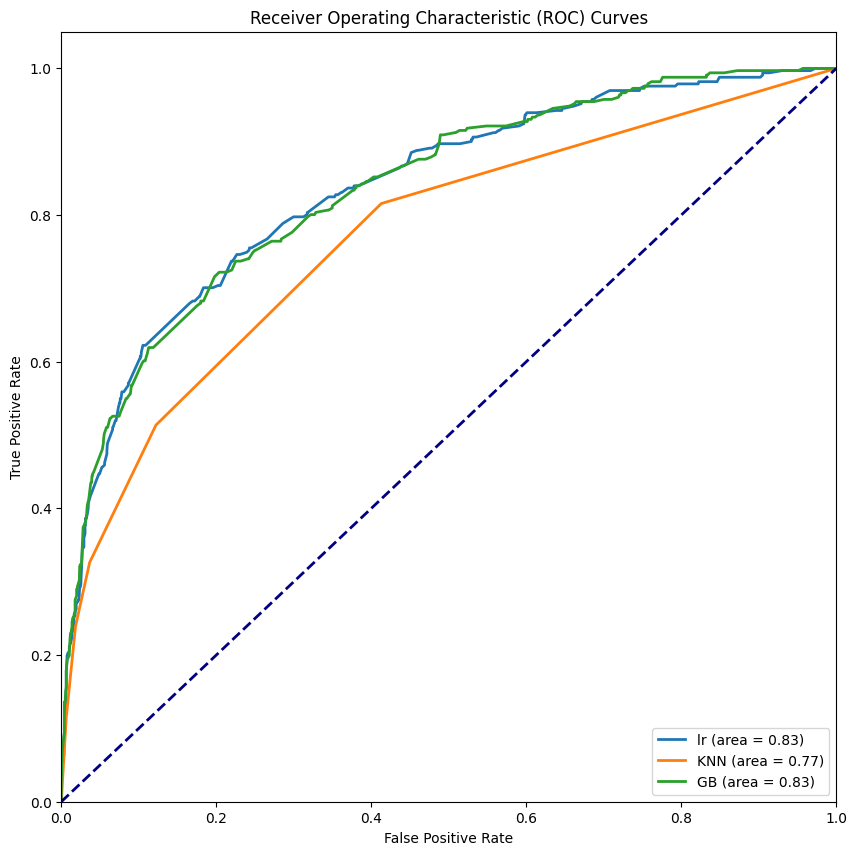

In [157]:
## Gradient boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

GB_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42))
    ])

GB_model_fit = GB_model.fit(X_train, y_train)

y_pred = GB_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = GB_model_fit.predict_proba(X_test)[:, 1]
# Example of how to call these functions
append_metrics('GB', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7616
Precision: 0.3438
Recall: 0.7644
F1-Score: 0.4742


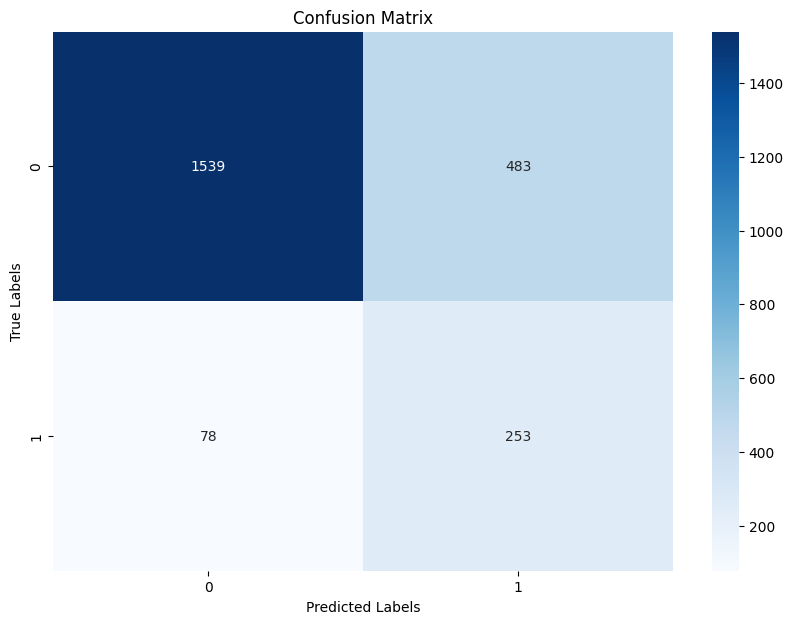

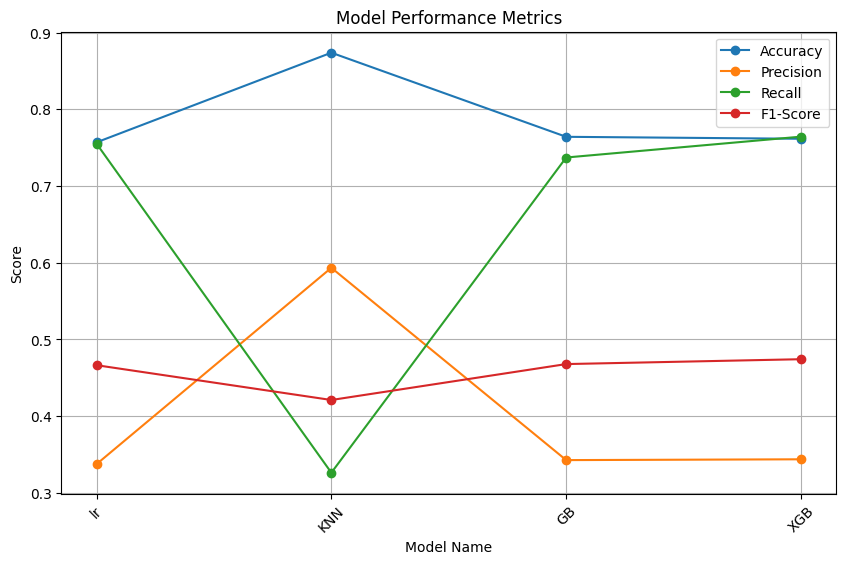

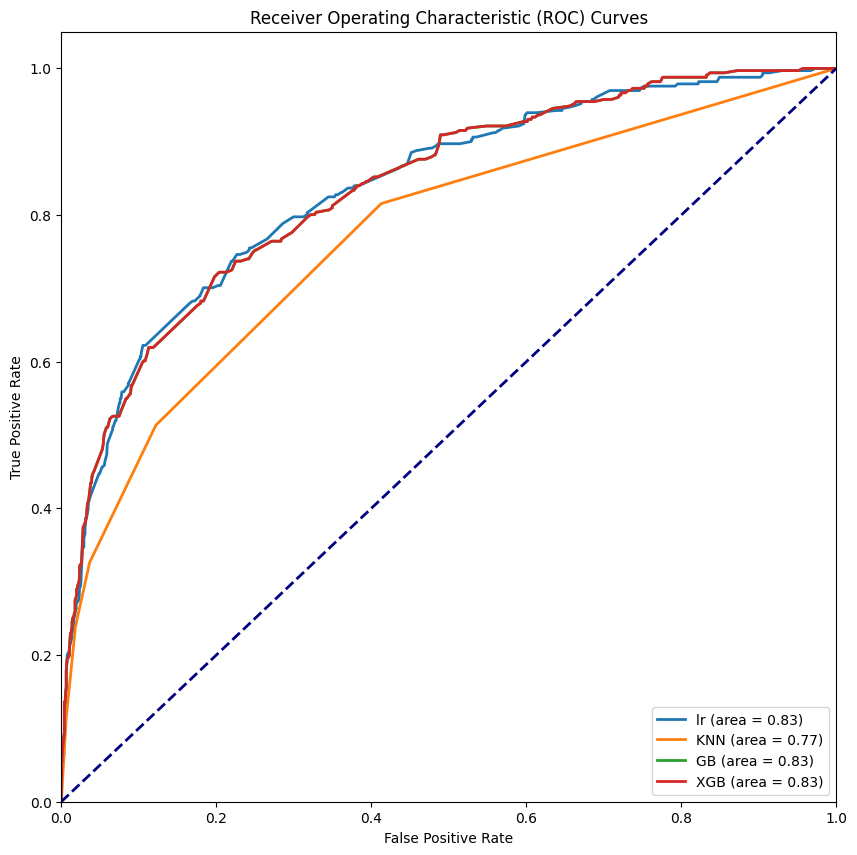

In [158]:
# XGboost
from xgboost import XGBClassifier
## Gradient boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

XGB_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),
    ('XGB', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])

XGB_model_fit = XGB_model.fit(X_train, y_train)
y_pred = XGB_model_fit.predict(X_test)

# Calculate and print metrics (assuming you've already defined or imported accuracy_score, precision_score, etc.)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = GB_model_fit.predict_proba(X_test)[:, 1]
# Example of how to call these functions
append_metrics('XGB', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()




Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


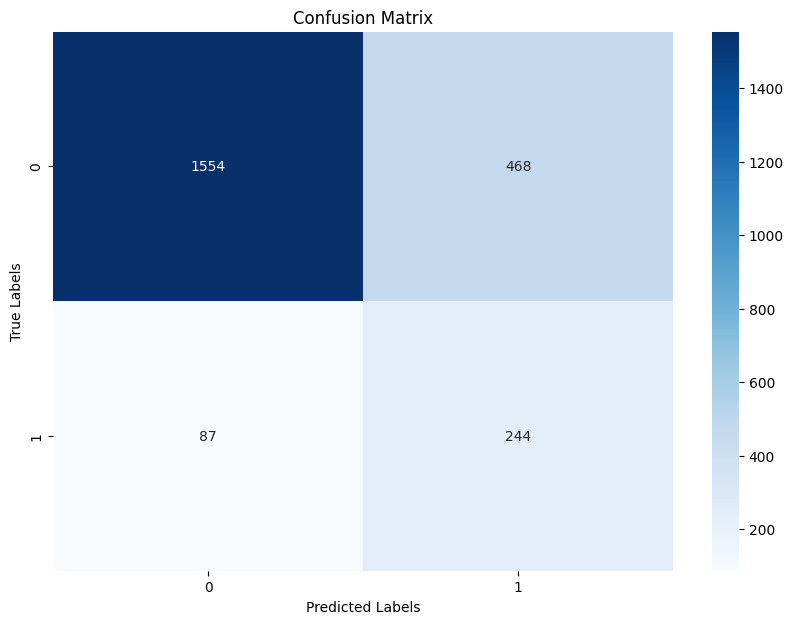

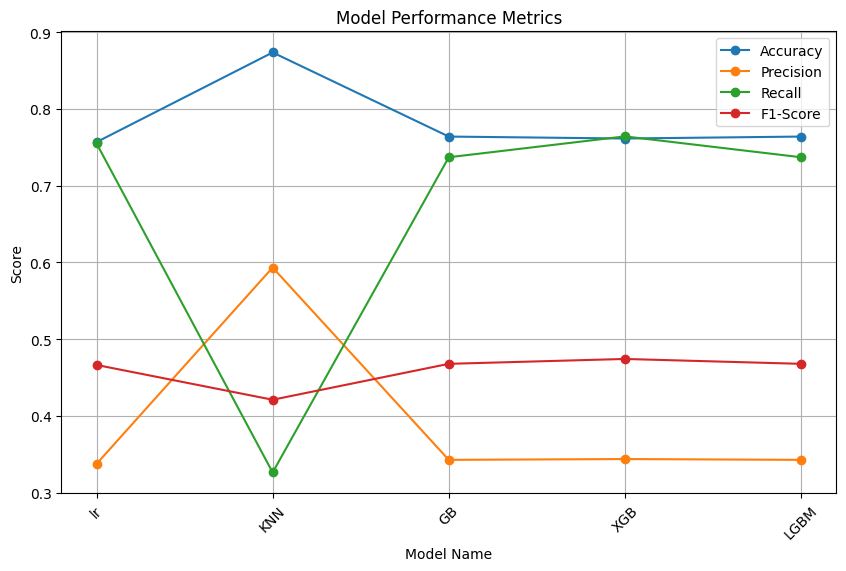

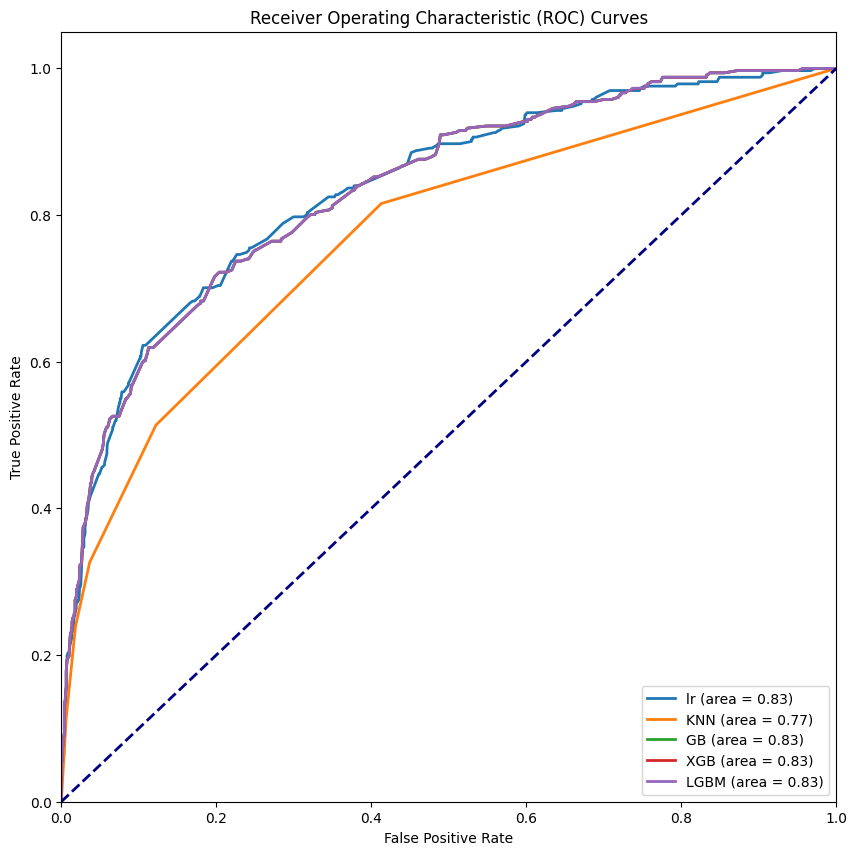

In [159]:
# lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

LGBM_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('LGBM', LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100))
    ])

LGBM_model_fit = GB_model.fit(X_train, y_train)

y_pred = LGBM_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = LGBM_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('LGBM', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


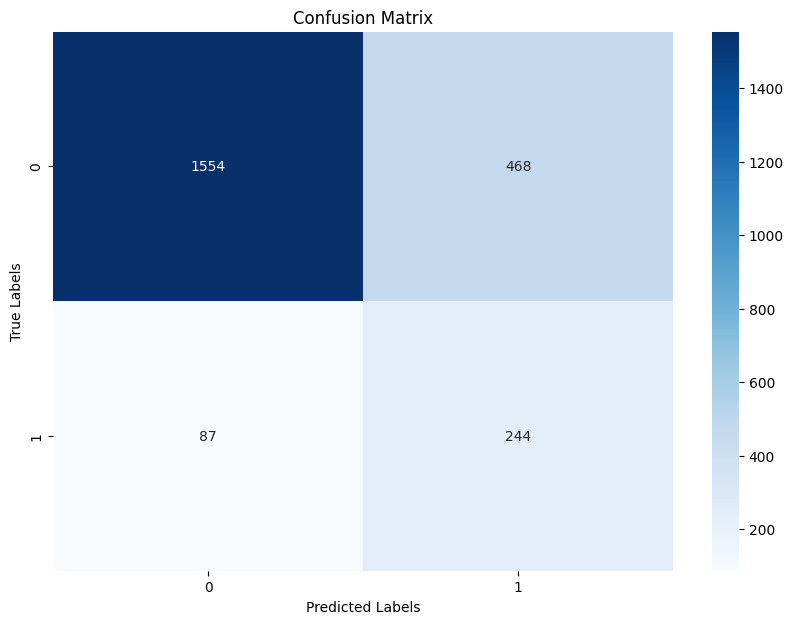

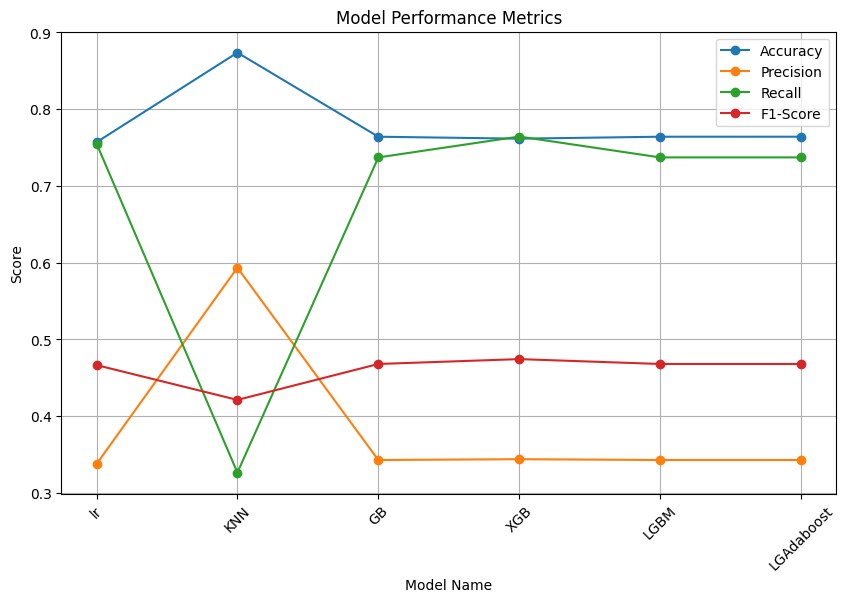

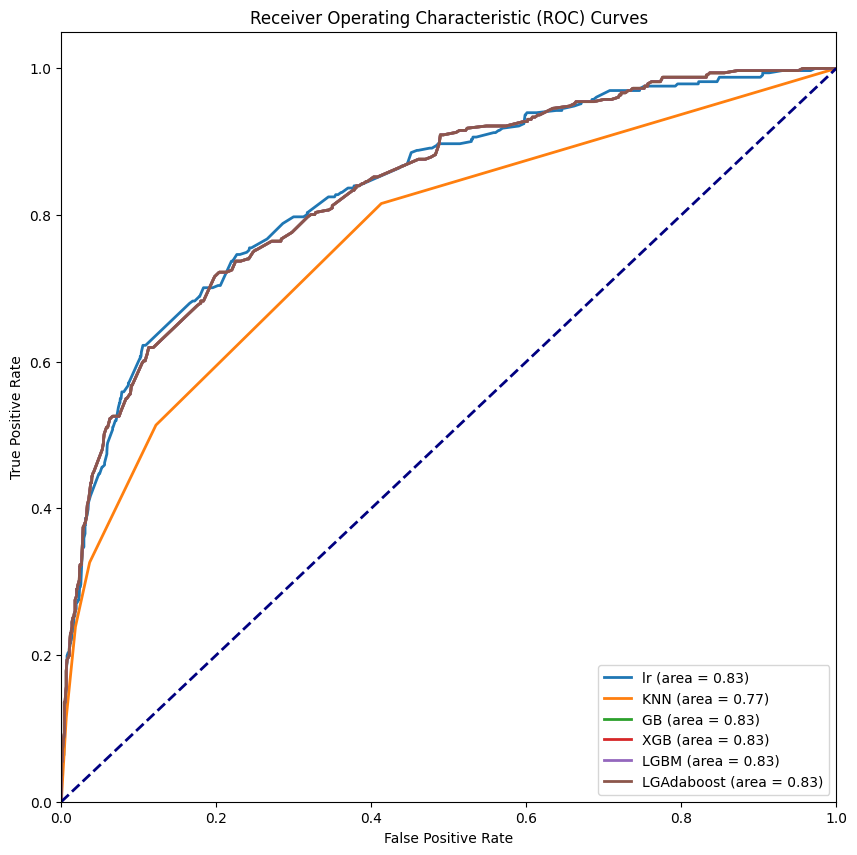

In [160]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

Adaboost_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('Adaboost', AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42))
    ])

Adaboost_model_fit = GB_model.fit(X_train, y_train)

y_pred = Adaboost_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = Adaboost_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('LGAdaboost', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.7641
Precision: 0.3427
Recall: 0.7372
F1-Score: 0.4679


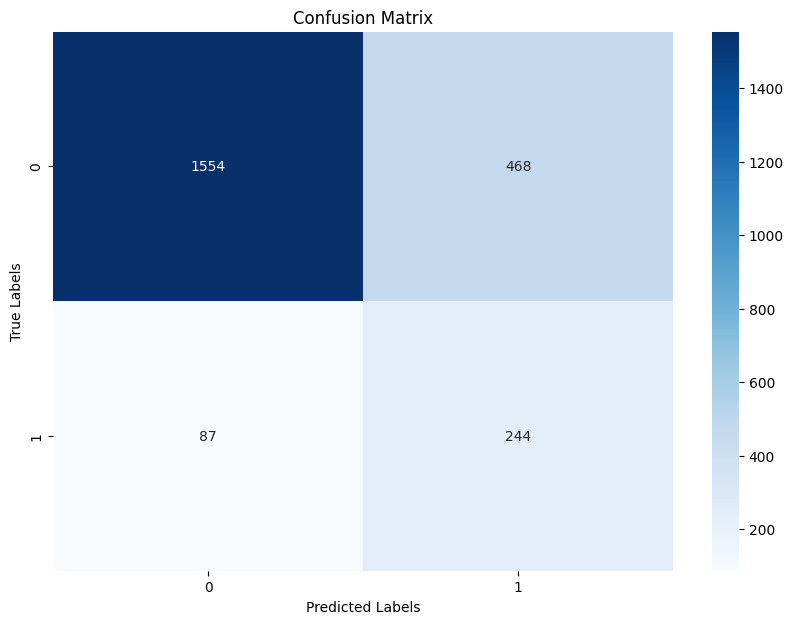

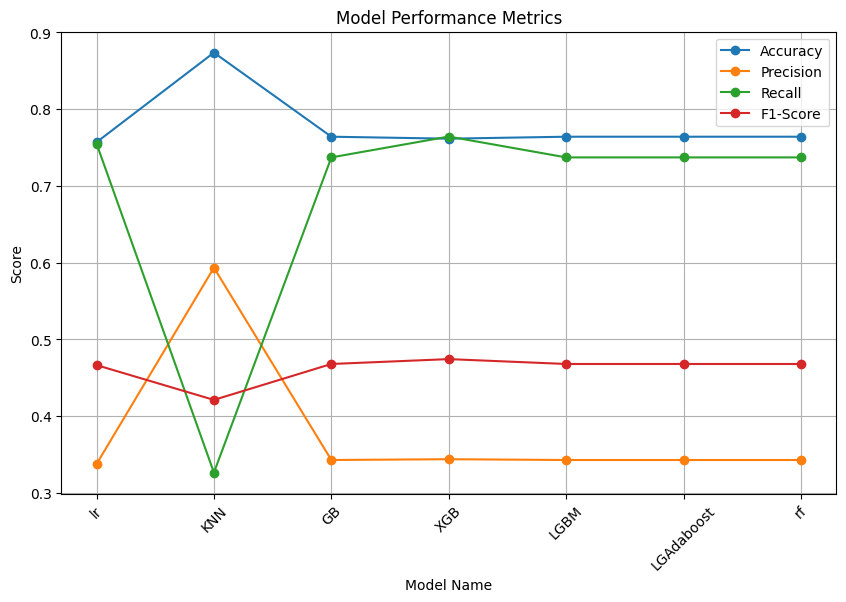

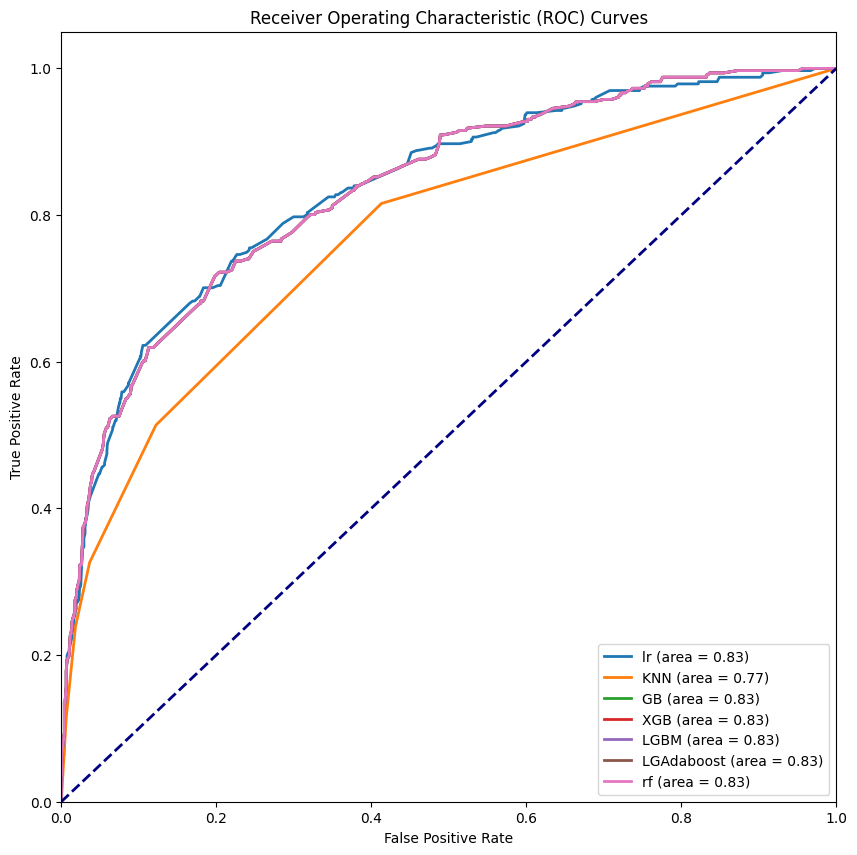

In [161]:
## randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

rf_model = Pipeline([
    ('processor', preprocessor),
    ('BestK', SelectKBest(score_func=f_classif)),
    ('imbalance', SMOTE(random_state=42)),  # Correct placement of comma
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

rf_model_fit = GB_model.fit(X_train, y_train)
y_pred = rf_model_fit.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = rf_model_fit.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('rf', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()

## Hard voting



[LightGBM] [Info] Number of positive: 18190, number of negative: 18190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 36380, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


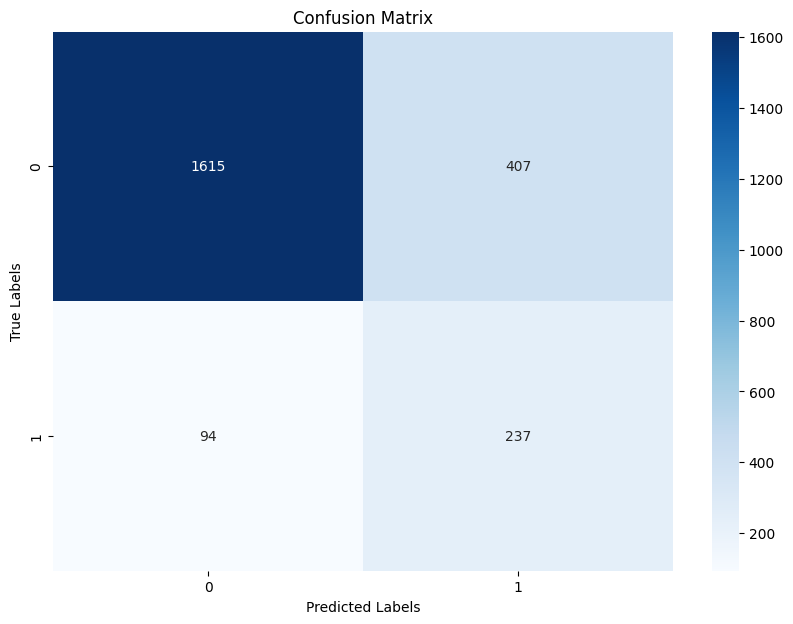

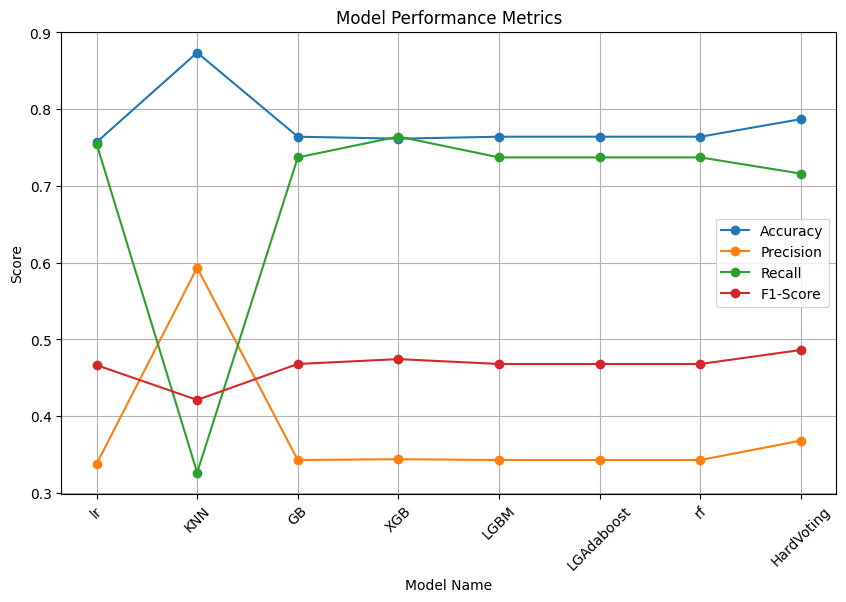

In [163]:
from sklearn.ensemble import VotingClassifier

HardVoting = VotingClassifier(
    estimators=[('KNN', KNN_model), ('GB', GB_model), ('LGBM', LGBM_model),
                ('Ada', Adaboost_model), ('rf', rf_model)],
    voting='hard')

HardVoting.fit(X_train, y_train)
y_pred = HardVoting.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
#scores = HardVoting.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('HardVoting', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
#plot_all_roc_curves()


[LightGBM] [Info] Number of positive: 18190, number of negative: 18190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 36380, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8296
Precision: 0.4289
Recall: 0.6375
F1-Score: 0.5128


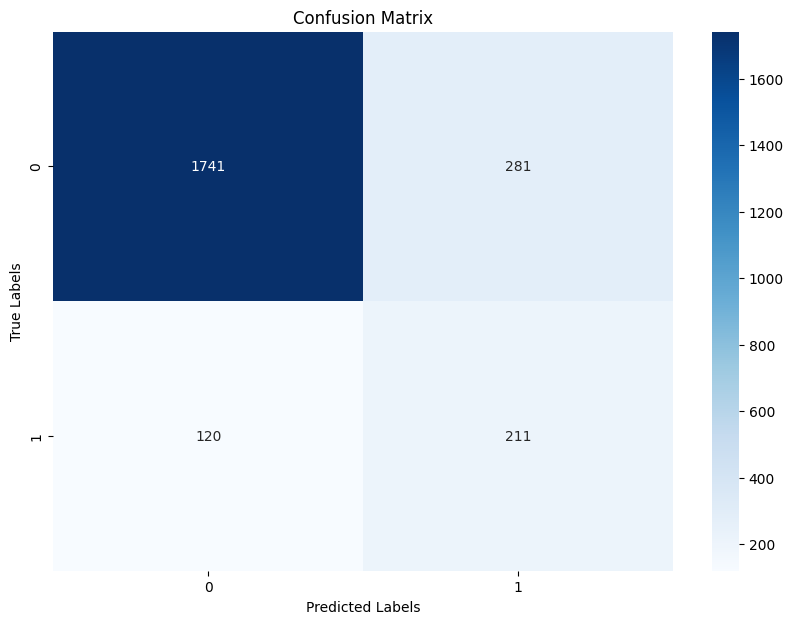

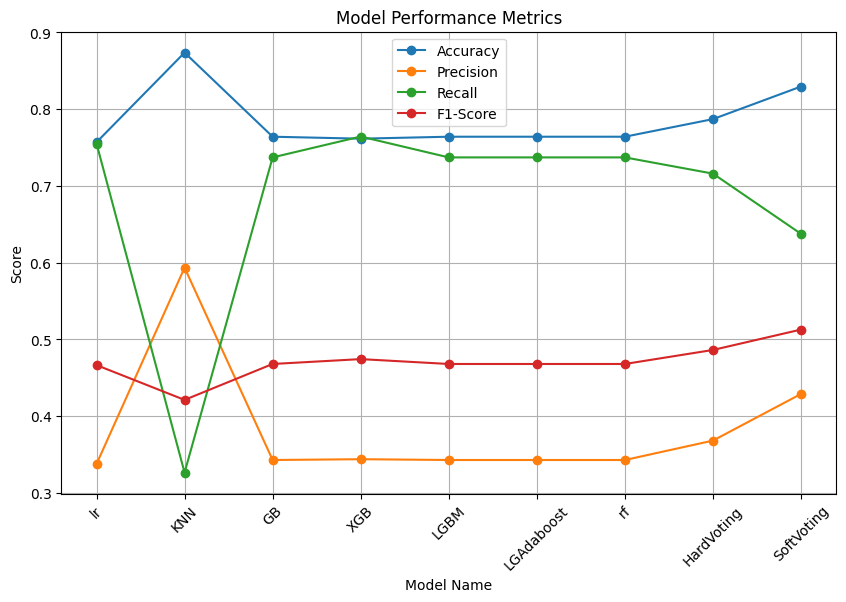

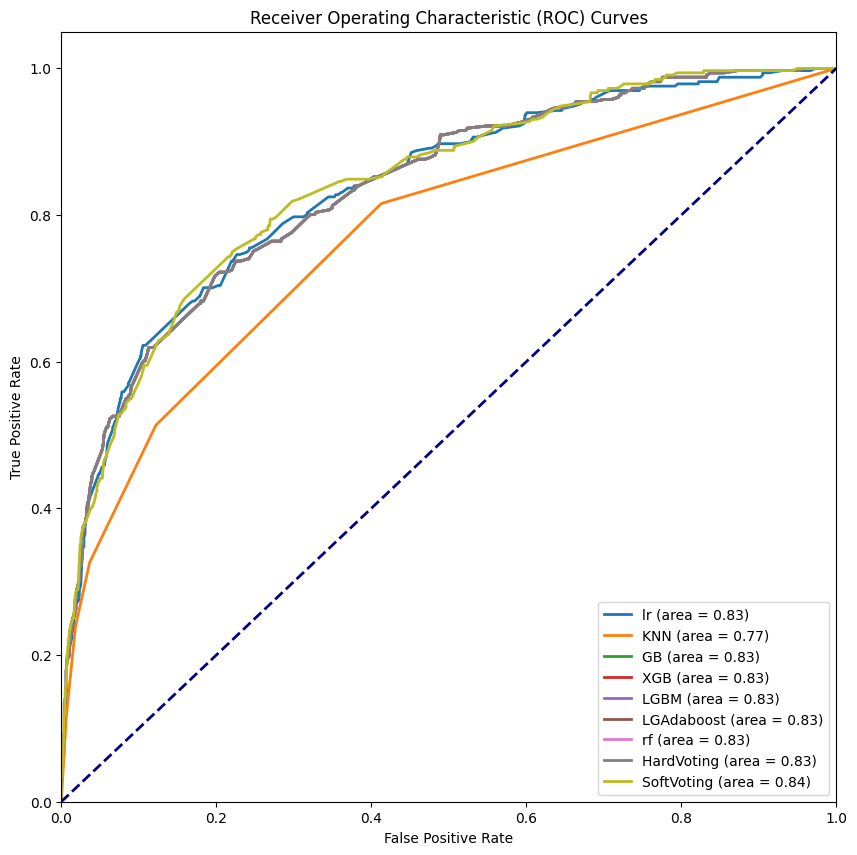

In [164]:
from sklearn.ensemble import VotingClassifier

SoftVoting = VotingClassifier(
    estimators=[('KNN', KNN_model), ('GB', GB_model), ('LGBM', LGBM_model),
                ('Ada', Adaboost_model), ('rf', rf_model)],
    voting='soft')

SoftVoting.fit(X_train, y_train)
y_pred = SoftVoting.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = SoftVoting.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('SoftVoting', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


Accuracy: 0.8908
Precision: 0.7202
Recall: 0.3656
F1-Score: 0.4850


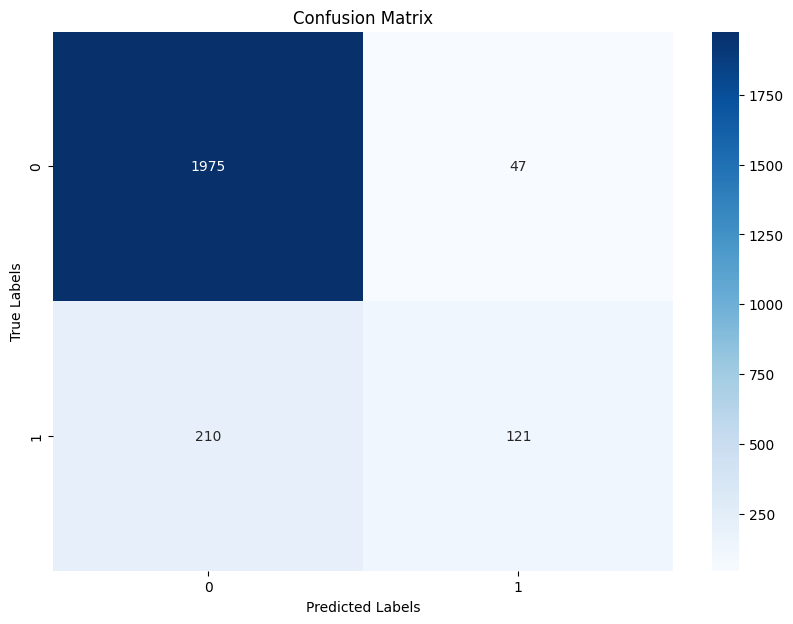

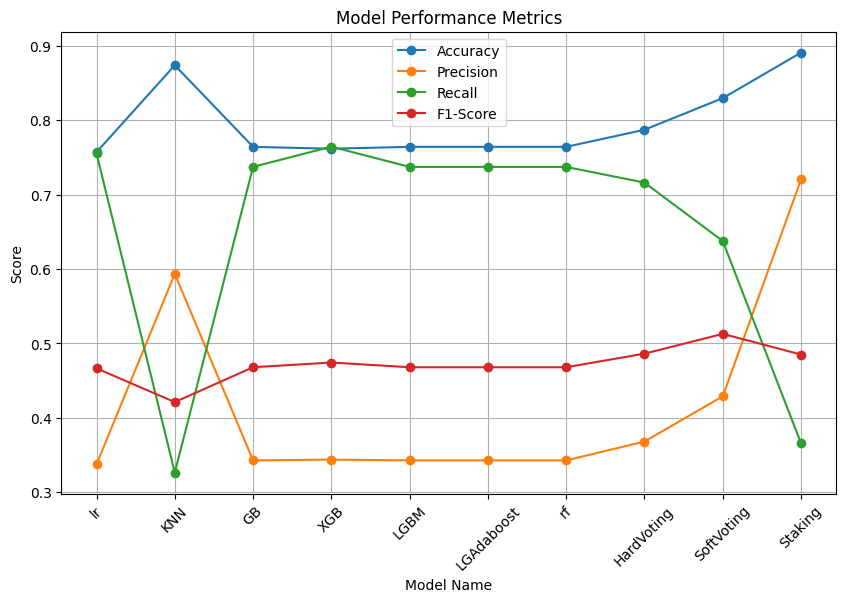

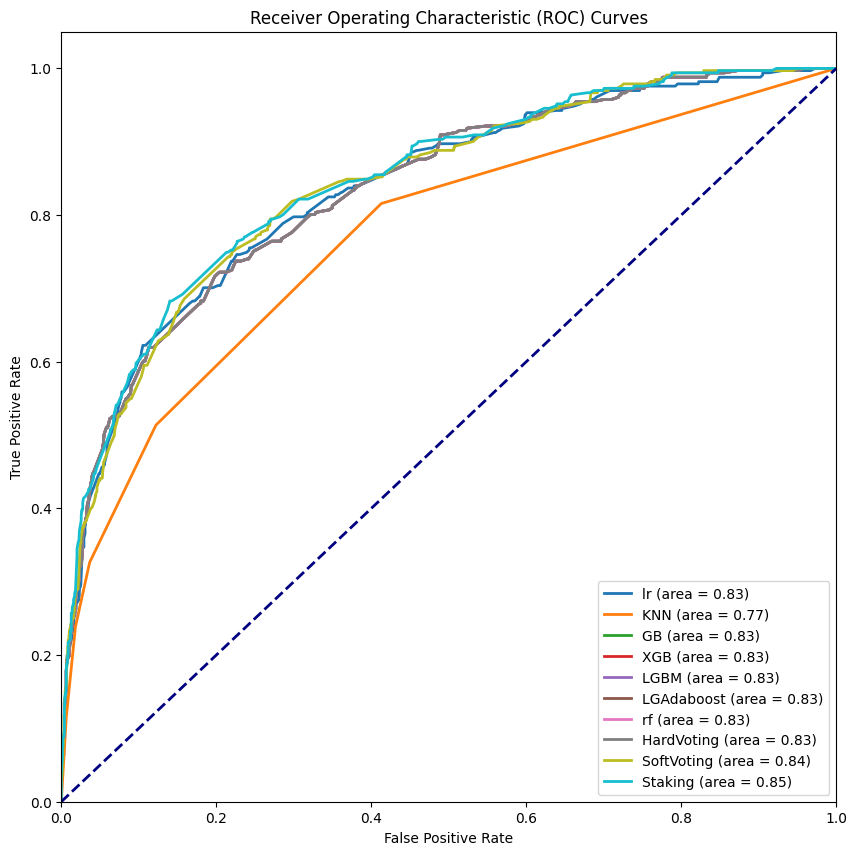

In [165]:
from sklearn.ensemble import StackingClassifier  # Use StackingRegressor for regression tasks
from sklearn.linear_model import LogisticRegressionCV
# Ensure the imports for your base estimators are included
# For example: from sklearn.neighbors import KNeighborsClassifier as KNN
# and so on for GB_model (Gradient Boosting), LGBM_model (LightGBM), Adaboost_model, and rf_model (Random Forest)

# Your base estimators should be initialized before this code block
estimators = [
    ('KNN', KNN_model),
    ('GB', GB_model),
    ('LGBM', LGBM_model),
    ('Ada', Adaboost_model),
    ('rf', rf_model)
]

final_estimator = LogisticRegressionCV(max_iter=1000, cv=5)  # cv parameter is optional but recommended for cross-validation

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,  # Optional: Number of cross-validation folds. Use it if you want to perform CV on the base layer.
    stack_method='auto',  # Optional: Method for the base estimators’ predictions. By default 'auto' chooses 'predict_proba' if available.
    n_jobs=-1  # Optional: Number of CPU cores used when parallelizing over classes. -1 means using all processors.
)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)


# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # average='weighted'
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Find unique classes directly from y_test for labels
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predict probabilities for the positive class (1)
scores = stacking_classifier.predict_proba(X_test)[:, 1]

# Example of how to call these functions
append_metrics('Staking', accuracy, precision, recall, f1, y_test, scores)
plot_metrics()
plot_all_roc_curves()


In [166]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Assuming preprocessor is already defined and fitted to your data
# Example: preprocessor = ColumnTransformer([...])

# Transform your training data
X_transformed = preprocessor.transform(X_train)

# Fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to keep all features for demonstration
selector.fit(X_transformed, y_train)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Extract feature names after transformation
# Check if your preprocessor has a 'get_feature_names_out' method
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = list(preprocessor.get_feature_names_out())
else:
    # Fallback: Generate feature names based on the transformed shape if names are not directly available
    feature_names = ['Feature' + str(i) for i in range(X_transformed.shape[1])]

# Create a DataFrame to display scores and p-values
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'ANOVA F-Score': scores,
    'p-value': p_values
}).sort_values(by='ANOVA F-Score', ascending=False)

print(feature_scores)


                                            Feature  ANOVA F-Score   
26                         Ordinal__education_level    2476.990501  \
16          cat__job_type_Formally employed Private    1380.958560   
15       cat__job_type_Formally employed Government    1234.741204   
24                        cat__cellphone_access_Yes     987.206912   
25                   cat__gender_of_respondent_Male     291.503718   
5     cat__relationship_with_head_Head of Household     264.026378   
18                cat__job_type_Informally employed     204.840016   
11      cat__marital_status_Married/Living together     174.372550   
3                             cat__country_Tanzania     172.322798   
23                         cat__location_type_Urban     154.506738   
9                cat__relationship_with_head_Spouse      71.576252   
19                          cat__job_type_No Income      68.982590   
2                               cat__country_Rwanda      64.123522   
13                  

In [92]:
print(len(feature_names), len(scores), len(p_values))


27 27 27


In [93]:
assert(1==2)

AssertionError: 

The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [ ]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

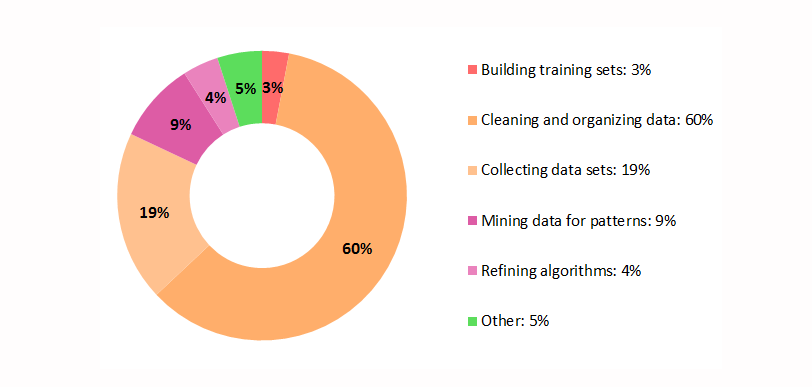

The first step is to separate the independent variables and target(bank_account) from the train data. Then transform the target values from the object data type into numerical by using [LabelEncoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).


In [ ]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


The target values have been transformed into numerical datatypes, **1** represents **‘Yes’** and **0** represents **‘No’**.

We have created a simple preprocessing function to:

*   Handle conversion of data types
*   Convert categorical features to numerical features by using [One-hot Encoder and Label Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)
*   Drop uniqueid variable
*   Perform [feature scaling](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9).

The processing function will be used for both train and test independent variables.

In [ ]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Preprocess both train and test dataset.

In [ ]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

Observe the first row in the train data.

In [ ]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


Observe the shape of the train data.

In [ ]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


Now we have more independent variables than before (37 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

###4. Model Building and Experiments
A portion of the train data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [ ]:
import sklearn.model_selection

In [ ]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

In [ ]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier()

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11049723756906082


Let’s check the confusion matrix for XGB model.

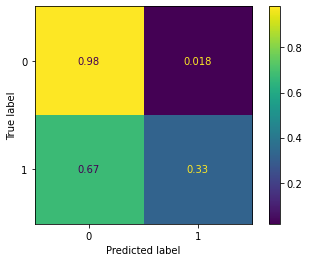

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 1, 'max_depth': 5, 'min_child_weighth': 1, 'subsample': 0.8}


The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.10837229069273269


Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [ ]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [ ]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
6062,uniqueid_12197 x Rwanda,0
2402,uniqueid_8471 x Kenya,1
4757,uniqueid_10892 x Rwanda,0
8590,uniqueid_8865 x Tanzania,0
3710,uniqueid_9845 x Rwanda,0


Save results in the CSV file.


In [ ]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************